<a href="https://colab.research.google.com/github/KenLo506/PoisonousMushroomLearningModel/blob/main/poisoinousmushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
mushroom_columns_names=['type','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
                        'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
                        'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
                        'spore-print-color', 'population', 'habitat']

In [ ]:
#load the dataset
import pandas as pd
import numpy as np
import os

data=pd.read_csv("agaricus-lepiota.data", names = mushroom_columns_names)
data.head()

,type,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
data.info()
#Checking the data we do not have any null inputs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   type                      8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
data['type'].value_counts()
#around balanced

e    4208
p    3916
Name: type, dtype: int64

In [ ]:
for col in data.columns.values:
    print(col, data[col].unique())

type ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

Remove any redundant features, in this dataset, that would be just veil type with a single value of 'p'

In [ ]:
for col in data.columns.values:
    if len(data[col].unique()) <= 1:
        # print("Removing column , which only contains the value: {}".format(col, data[col].unique()[0]))
        data = data.drop([col],axis=1)

Replace ? values

In [ ]:
data = data.replace('?', np.nan)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


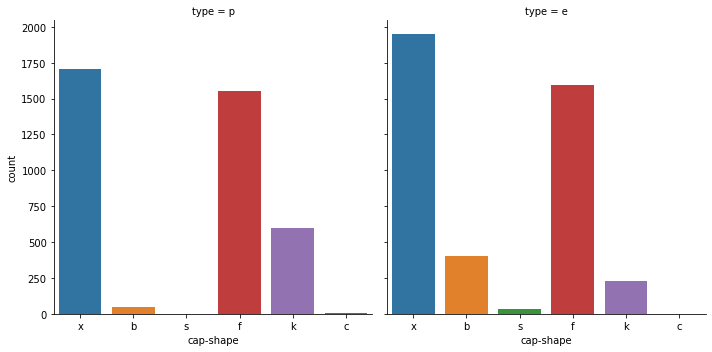

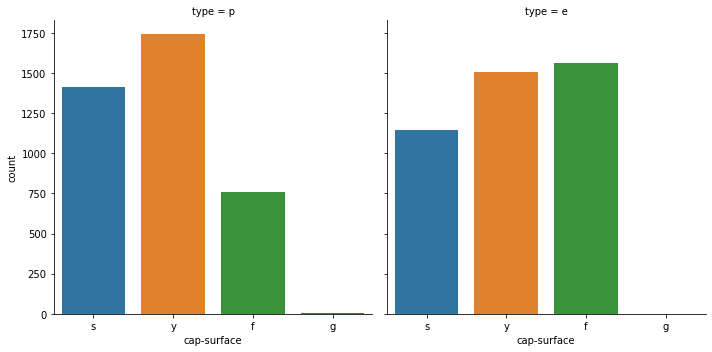

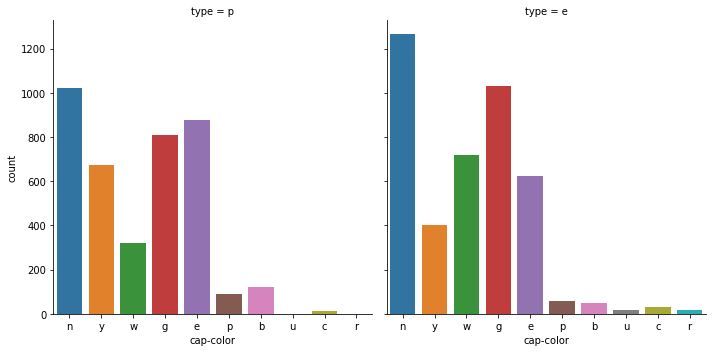

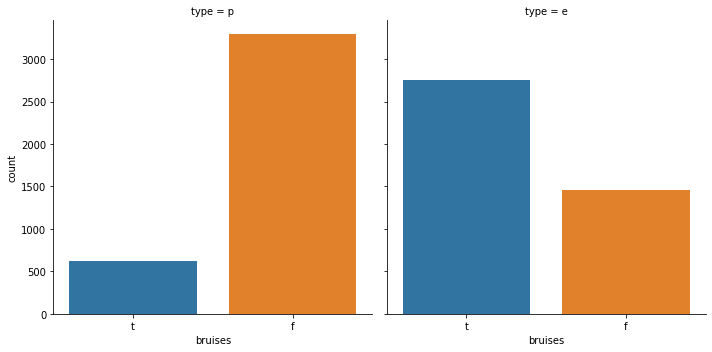

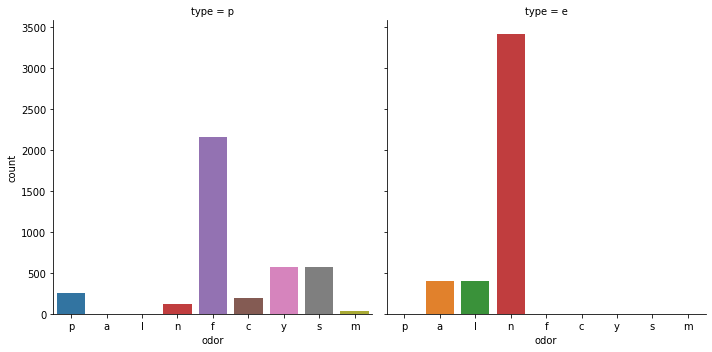

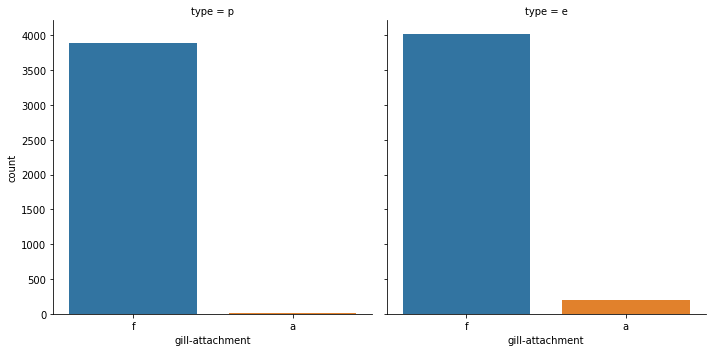

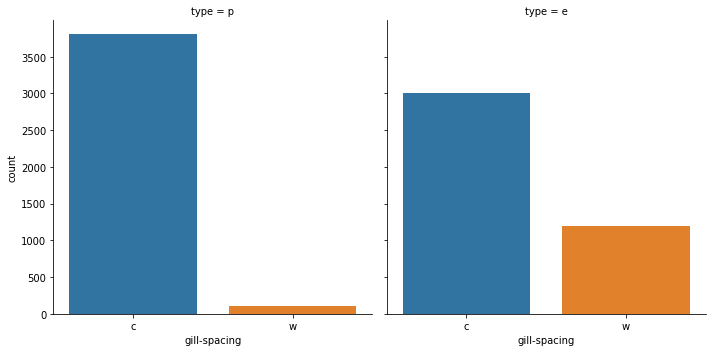

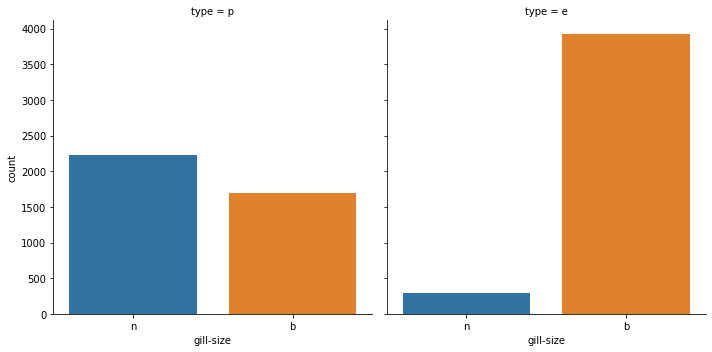

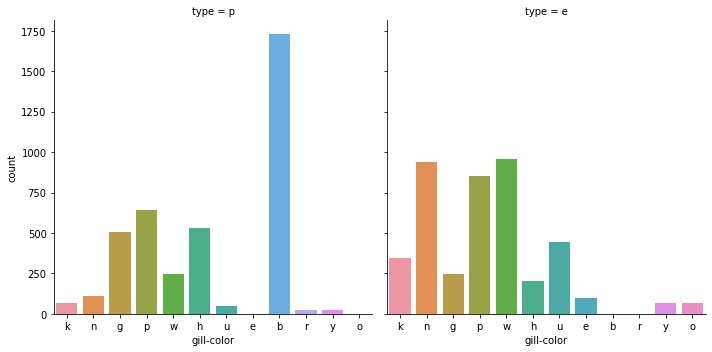

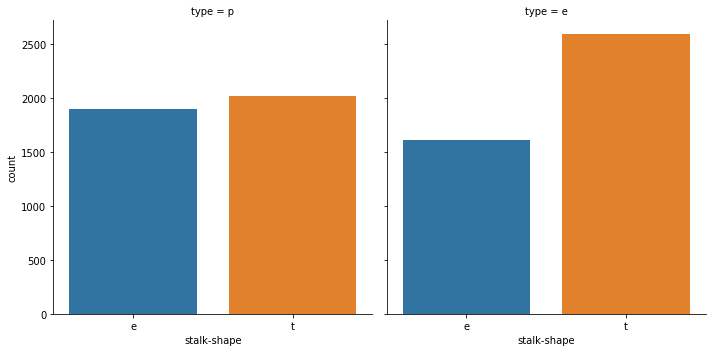

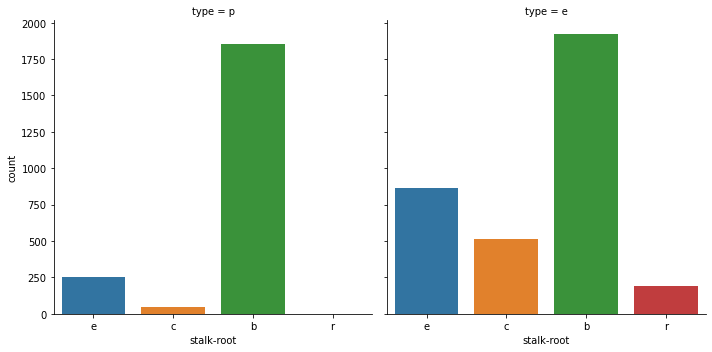

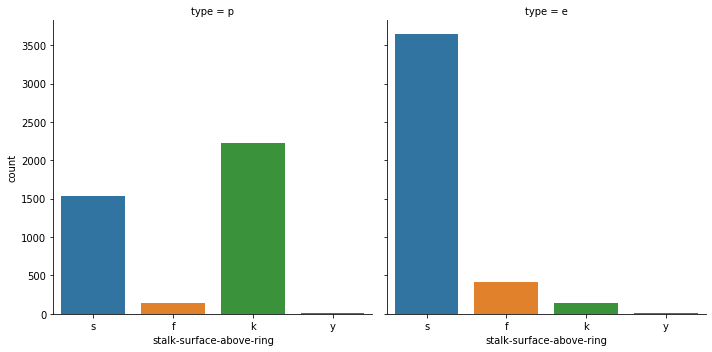

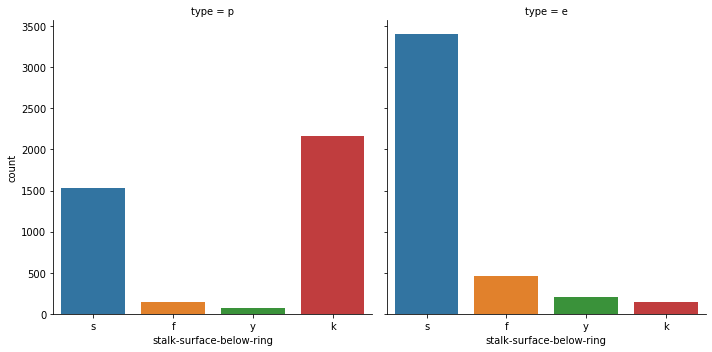

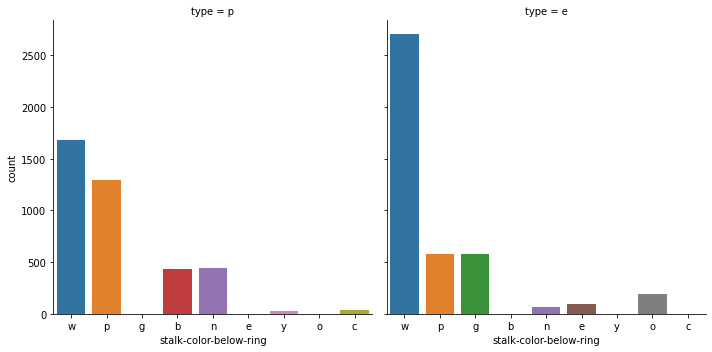

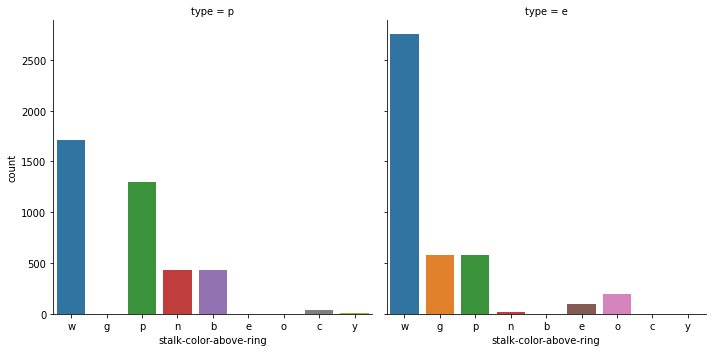

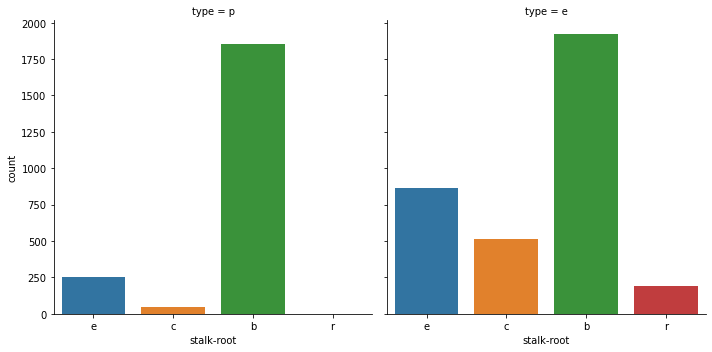

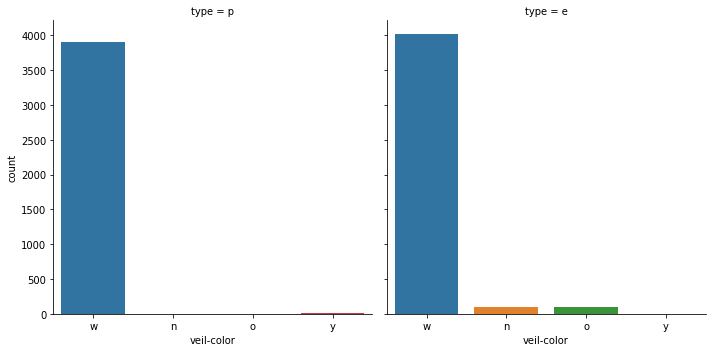

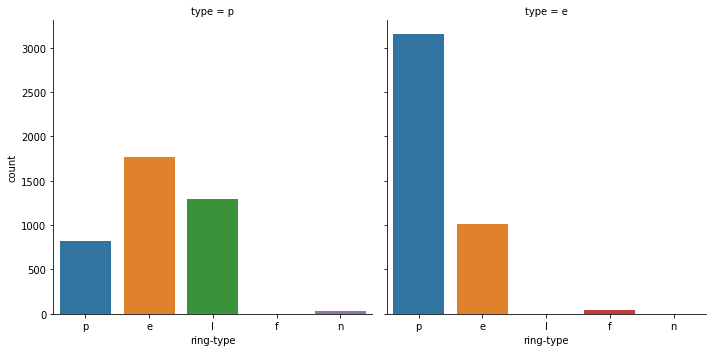

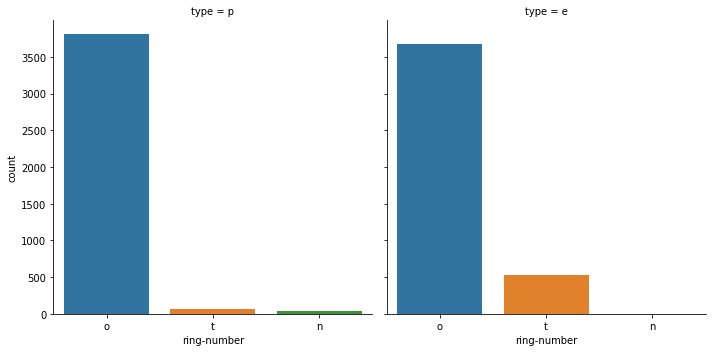

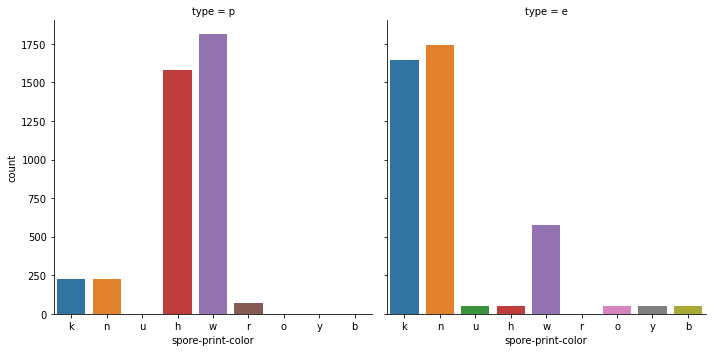

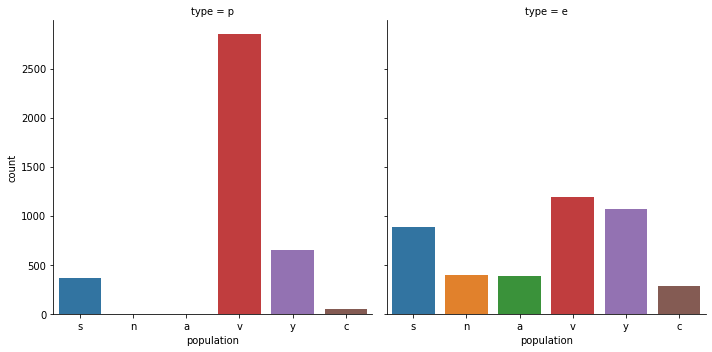

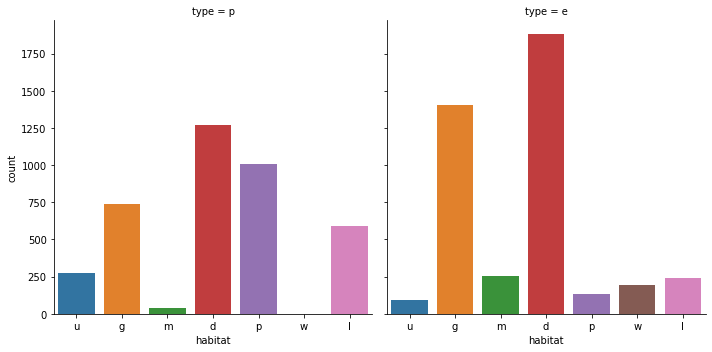

In [ ]:
sns.catplot(x="cap-shape", data=data, col="type", kind="count")
sns.catplot(x="cap-surface", data=data, col="type", kind="count")
sns.catplot(x="cap-color", data=data, col="type", kind="count")
sns.catplot(x="bruises", data=data, col="type", kind="count")
sns.catplot(x="odor", data=data, col="type", kind="count")
sns.catplot(x="gill-attachment", data=data, col="type", kind="count")
sns.catplot(x="gill-spacing", data=data, col="type", kind="count")
sns.catplot(x="gill-size", data=data, col="type", kind="count")
sns.catplot(x="gill-color", data=data, col="type", kind="count")
sns.catplot(x="stalk-shape", data=data, col="type", kind="count")
sns.catplot(x="stalk-root", data=data, col="type", kind="count")
sns.catplot(x="stalk-surface-above-ring", data=data, col="type", kind="count")
sns.catplot(x="stalk-surface-below-ring", data=data, col="type", kind="count")
sns.catplot(x="stalk-color-below-ring", data=data, col="type", kind="count")
sns.catplot(x="stalk-color-above-ring", data=data, col="type", kind="count")
sns.catplot(x="stalk-root", data=data, col="type", kind="count")
sns.catplot(x="veil-color", data=data, col="type", kind="count")
sns.catplot(x="ring-type", data=data, col="type", kind="count")
sns.catplot(x="ring-number", data=data, col="type", kind="count")
sns.catplot(x="spore-print-color", data=data, col="type", kind="count")
sns.catplot(x="population", data=data, col="type", kind="count")
sns.catplot(x="habitat", data=data, col="type", kind="count")

Using the raw data we are given, with frequency analysis between type and feature, we can make some pretty solid bets with our mushrooms with just one on one analysis.

Picking the ones that have a decent sample size:


Depending on your risk tolerance, some of our safest options are odorless mushrooms and mushrooms with black/brown spore-print-color. Safe(ish) options is broad gill mushrooms and mushroom with bruises.

When it comes to poisonous mushrooms definitely avoid buff gill-color mushrooms, mushroom without bruises, chocolate/white spore-print-color.

In [ ]:
print("Odds odorless mushrooms are edible:", data[(data['odor'] == 'n') & (data['type'] == 'e')]['cap-shape'].count()/data[ (data['odor'] == 'n')]['cap-shape'].count(),"%", '\nSample size being:', data[ (data['odor'] == 'n')]['cap-shape'].count())

Odds odorless mushrooms are edible: 0.9659863945578231 % 
Sample size being: 3528


In [ ]:
print("Odds black spore print color mushrooms are edible:", data[(data['spore-print-color'] == 'k') & (data['type'] == 'e')]['cap-shape'].count()/data[ (data['spore-print-color'] == 'k')]['cap-shape'].count(),"%", '\nSample size being:', data[ (data['spore-print-color'] == 'k')]['cap-shape'].count())

Odds black spore print color mushrooms are edible: 0.8803418803418803 % 
Sample size being: 1872


In [ ]:
print("Odds brown spore print color mushrooms are edible:", data[(data['spore-print-color'] == 'n') & (data['type'] == 'e')]['cap-shape'].count()/data[ (data['spore-print-color'] == 'n')]['cap-shape'].count(),"%", '\nSample size being:', data[ (data['spore-print-color'] == 'n')]['cap-shape'].count())

Odds brown spore print color mushrooms are edible: 0.8861788617886179 % 
Sample size being: 1968


In [ ]:
print("Odds mushrooms with bruises are edible:", data[(data['bruises'] == 't') & (data['type'] == 'e')]['cap-shape'].count()/data[ (data['bruises'] == 't')]['cap-shape'].count(),"%", '\nSample size being:',data[ (data['bruises'] == 't')]['cap-shape'].count())

Odds mushrooms with bruises are edible: 0.8151658767772512 % 
Sample size being: 3376


In [ ]:
print("Odds broad gill mushrooms are edible:", data[(data['gill-size'] == 'b') & (data['type'] == 'e')]['cap-shape'].count()/data[ (data['gill-size'] == 'b')]['cap-shape'].count(),"%", '\nSample size being:', data[ (data['gill-size'] == 'b')]['cap-shape'].count())

Odds broad gill mushrooms are edible: 0.6985032074126871 % 
Sample size being: 5612


In [ ]:
print("Odds buff gill color mushrooms are edible:", data[(data['gill-color'] == 'b') & (data['type'] == 'e')]['cap-shape'].count()/data[ (data['gill-color'] == 'b')]['cap-shape'].count(),"%", '\nSample size being:', data[ (data['gill-color'] == 'b')]['cap-shape'].count())

Odds buff gill color mushrooms are edible: 0.0 % 
Sample size being: 1728


In [ ]:
print("Odds mushrooms without bruises are edible:", data[(data['bruises'] == 'f') & (data['type'] == 'e')]['cap-shape'].count()/data[ (data['bruises'] == 'f')]['cap-shape'].count(),"%", '\nSample size being:',data[ (data['bruises'] == 'f')]['cap-shape'].count())

Odds mushrooms without bruises are edible: 0.3066554338668913 % 
Sample size being: 4748


In [ ]:
print("Odds chocolate spore print color mushrooms are edible:", data[(data['spore-print-color'] == 'h') & (data['type'] == 'e')]['cap-shape'].count()/data[ (data['spore-print-color'] == 'h')]['cap-shape'].count(),"%", '\nSample size being:', data[ (data['spore-print-color'] == 'h')]['cap-shape'].count())

Odds chocolate spore print color mushrooms are edible: 0.029411764705882353 % 
Sample size being: 1632


In [ ]:
print("Odds white spore print color mushrooms are edible:", data[(data['spore-print-color'] == 'w') & (data['type'] == 'e')]['cap-shape'].count()/data[ (data['spore-print-color'] == 'w')]['cap-shape'].count(),"%", '\nSample size being:', data[ (data['spore-print-color'] == 'w')]['cap-shape'].count())

Odds white spore print color mushrooms are edible: 0.24120603015075376 % 
Sample size being: 2388


<Figure size 1008x432 with 0 Axes>

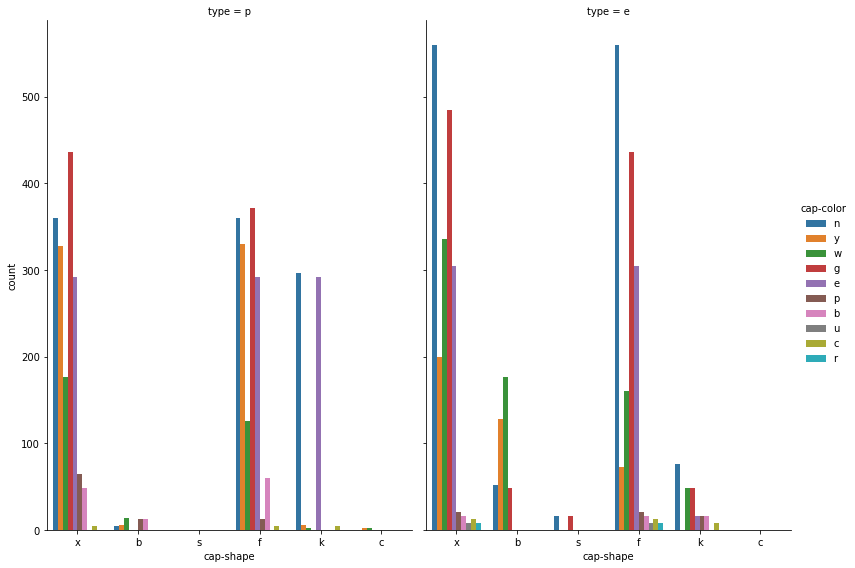

In [ ]:
plt.figure(figsize = (14,6))
g = sns.catplot(x ='cap-shape', hue = 'cap-color', col = 'type',
                data = data, kind = 'count',
                height= 8 , aspect=.7)

Because cap-shape and cap-color have similar charts, they aren't useful on its on so we want to see if we can integrate them together to create correlation.

Also using the two most distinctive features (cap-shape and cap-color) we want to see if theres any obvious choice for edible or poisonious mushroom on glance.

Most of the data shows that knobbed shaped mushrooms should be avoided as well as yellow mushrooms in general, especially if they are flat shaped.

We can also see that bell shaped mushrooms have a very good chance of being edible, especially the white colored ones.

The rest of the data shown by just cap-color and cap-shape seems to not be reliable enough to risk > 30% chance of being poisonious


In [ ]:
print("Odds white cap bell shaped mushrooms are edible:", data[(data['cap-color'] == 'w') & (data['cap-shape'] == 'b') & (data['type'] == 'e')]['cap-shape'].count()/data[ (data['cap-color'] == 'w') & (data['cap-shape'] == 'b')]['cap-shape'].count(),"%", '\nSample size being:',data[ (data['cap-color'] == 'w') & (data['cap-shape'] == 'b')]['cap-shape'].count())

Odds white cap bell shaped mushrooms are edible: 0.9263157894736842 % 
Sample size being: 190


In [ ]:
print("Odds bell shaped mushrooms are edible:", data[(data['cap-shape'] == 'b') & (data['type'] == 'e')]['cap-shape'].count()/data[ (data['cap-shape'] == 'b')]['cap-shape'].count(),"%", '\nSample size being:',data[ (data['cap-shape'] == 'b')]['cap-shape'].count())

Odds bell shaped mushrooms are edible: 0.8938053097345132 % 
Sample size being: 452


In [ ]:
print("Odds knobbed shaped mushrooms are edible:", data[(data['cap-shape'] == 'k') & (data['type'] == 'e')]['cap-shape'].count()/data[ (data['cap-shape'] == 'k')]['cap-shape'].count(),"%", '\nSample size being:',data[ (data['cap-shape'] == 'k')]['cap-shape'].count())

Odds knobbed shaped mushrooms are edible: 0.2753623188405797 % 
Sample size being: 828


In [ ]:
print("Odds yellow cap mushrooms are edible:", data[(data['cap-color'] == 'y') & (data['type'] == 'e')]['cap-shape'].count()/data[ (data['cap-color'] == 'y')]['cap-shape'].count(),"%", '\nSample size being:',data[ (data['cap-color'] == 'y')]['cap-shape'].count())

Odds yellow cap mushrooms are edible: 0.373134328358209 % 
Sample size being: 1072


<Figure size 1008x432 with 0 Axes>

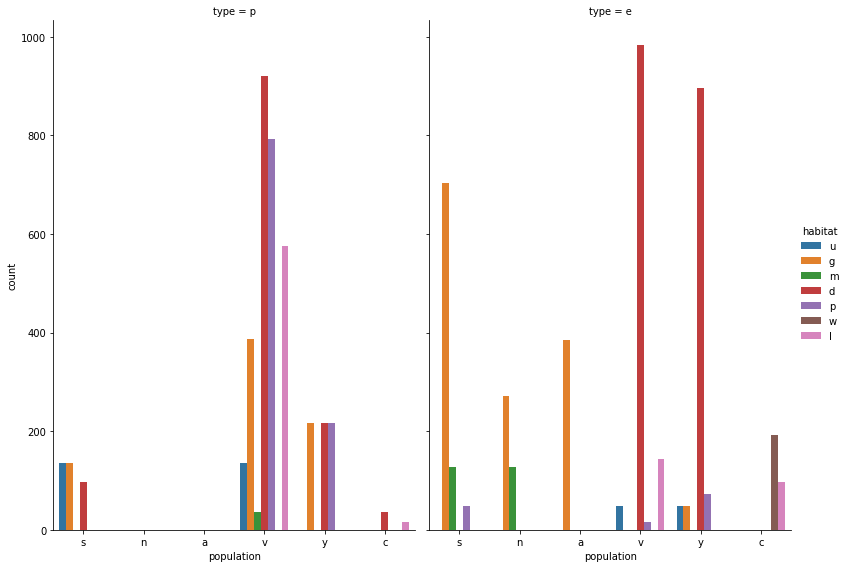

In [ ]:
plt.figure(figsize = (14,6))
g = sns.catplot(x ='population', hue = 'habitat', col = 'type', data = data, kind = 'count', height= 8 , aspect=.7)

Another example of indifferent charts is the population and habitat charts so I also combined them to find relevance. Sure enough, when in the context of population(scarcity/density) habitats seem to have some defining features.

In grassy habitats, scattered, numerous, abudant mushrooms will be quite safe, the more you see the better! As opposed to seeing them in several or solitary population.

In the woods you would have a ~80% chance of encountering a safe mushroom if its found in solitary.

Avoid mushrooms found on leaves and paths altogether.

In [ ]:
print("Odds for edible scattered mushrooms in grass habitat :", data[(data['habitat'] == 'g') & (data['type'] == 'e') & (data['population'] == 's')]['cap-shape'].count()/data[(data['habitat'] == 'g') & (data['population'] == 's')]['cap-shape'].count(),"%", '\nSample size being:',data[(data['habitat'] == 'g') & (data['population'] == 's')]['cap-shape'].count())

Odds for edible scattered mushrooms in grass habitat : 0.8380952380952381 % 
Sample size being: 840


In [ ]:
print("Odds for edible numerous mushrooms in grass habitat :", data[(data['habitat'] == 'g') & (data['type'] == 'e') & (data['population'] == 'n')]['cap-shape'].count()/data[(data['habitat'] == 'g') & (data['population'] == 'n')]['cap-shape'].count(),"%", '\nSample size being:',data[(data['habitat'] == 'g') & (data['population'] == 'n')]['cap-shape'].count())

Odds for edible numerous mushrooms in grass habitat : 1.0 % 
Sample size being: 272


In [ ]:
print("Odds for edible abudant mushrooms in grass habitat :", data[(data['habitat'] == 'g') & (data['type'] == 'e') & (data['population'] == 'a')]['cap-shape'].count()/data[(data['habitat'] == 'g') & (data['population'] == 'a')]['cap-shape'].count(),"%", '\nSample size being:',data[(data['habitat'] == 'g') & (data['population'] == 'a')]['cap-shape'].count())

Odds for edible abudant mushrooms in grass habitat : 1.0 % 
Sample size being: 384


In [ ]:
print("Odds for edible several mushrooms in grass habitat :", data[(data['habitat'] == 'g') & (data['type'] == 'e') & (data['population'] == 'v')]['cap-shape'].count()/data[(data['habitat'] == 'g') & (data['population'] == 'v')]['cap-shape'].count(),"%", '\nSample size being:',data[(data['habitat'] == 'g') & (data['population'] == 'v')]['cap-shape'].count())

Odds for edible several mushrooms in grass habitat : 0.0 % 
Sample size being: 388


In [ ]:
print("Odds for edible solitary mushrooms in grass habitat :", data[(data['habitat'] == 'g') & (data['type'] == 'e') & (data['population'] == 'y')]['cap-shape'].count()/data[(data['habitat'] == 'g') & (data['population'] == 'y')]['cap-shape'].count(),"%", '\nSample size being:',data[(data['habitat'] == 'g') & (data['population'] == 'y')]['cap-shape'].count())

Odds for edible solitary mushrooms in grass habitat : 0.18181818181818182 % 
Sample size being: 264


In [ ]:
print("Odds solitary mushroom is edible in the woods:", data[(data['population'] == 'y') & (data['habitat'] == 'd') & (data['type'] == 'e')]['cap-shape'].count()/data[(data['population'] == 'y') & (data['habitat'] == 'd')]['cap-shape'].count(),"%", '\nSample size being:',data[(data['population'] == 'y') & (data['habitat'] == 'd')]['cap-shape'].count())

Odds solitary mushroom is edible in the woods: 0.8057553956834532 % 
Sample size being: 1112


In [ ]:
print("Odds mushroom is edible on paths:", data[(data['habitat'] == 'p') & (data['type'] == 'e')]['cap-shape'].count()/data[ (data['habitat'] == 'p')]['cap-shape'].count(),"%", '\nSample size being:',data[ (data['habitat'] == 'p')]['cap-shape'].count())

Odds mushroom is edible on paths: 0.11888111888111888 % 
Sample size being: 1144


In [ ]:
print("Odds mushroom is edible on leaves:", data[(data['habitat'] == 'l') & (data['type'] == 'e')]['cap-shape'].count()/data[ (data['habitat'] == 'l')]['cap-shape'].count(),"%", '\nSample size being:',data[ (data['habitat'] == 'l')]['cap-shape'].count())

Odds mushroom is edible on leaves: 0.28846153846153844 % 
Sample size being: 832


<Figure size 1008x432 with 0 Axes>

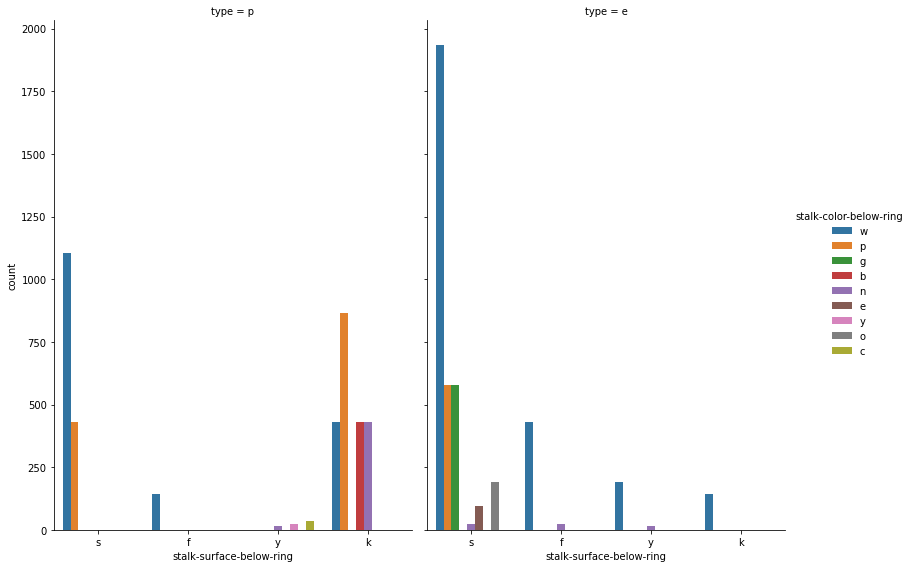

In [ ]:
plt.figure(figsize = (14,6))
g = sns.catplot(x ='stalk-surface-below-ring', hue = 'stalk-color-below-ring', col = 'type', data = data, kind = 'count', height= 8 , aspect=.7)

Observing texture and color below the mushroom ring, we can see that silky(k) mushrooms should be avoided altogether. The following is the risk of each texture.

In [ ]:
print("Odds silky mushroom is edible :", data[(data['stalk-surface-below-ring'] == 'k') & (data['type'] == 'e')]['cap-shape'].count()/data[(data['stalk-surface-below-ring'] == 'k')]['cap-shape'].count(),"%", '\nSample size being:',data[(data['stalk-surface-below-ring'] == 'k')]['cap-shape'].count())

Odds silky mushroom is edible : 0.0625 % 
Sample size being: 2304


In [ ]:
print("Odds smooth mushroom is edible :", data[(data['stalk-surface-below-ring'] == 's') & (data['type'] == 'e')]['cap-shape'].count()/data[(data['stalk-surface-below-ring'] == 's')]['cap-shape'].count(),"%", '\nSample size being:',data[(data['stalk-surface-below-ring'] == 's')]['cap-shape'].count())

Odds smooth mushroom is edible : 0.6888168557536467 % 
Sample size being: 4936


In [ ]:
print("Odds fibrous mushroom is edible :", data[(data['stalk-surface-below-ring'] == 'f') & (data['type'] == 'e')]['cap-shape'].count()/data[(data['stalk-surface-below-ring'] == 'f')]['cap-shape'].count(),"%", '\nSample size being:',data[(data['stalk-surface-below-ring'] == 'f')]['cap-shape'].count())

Odds fibrous mushroom is edible : 0.76 % 
Sample size being: 600


In [ ]:
print("Odds scaly mushroom is edible :", data[(data['stalk-surface-below-ring'] == 'y') & (data['type'] == 'e')]['cap-shape'].count()/data[(data['stalk-surface-below-ring'] == 'y')]['cap-shape'].count(),"%", '\nSample size being:',data[(data['stalk-surface-below-ring'] == 'y')]['cap-shape'].count())

Odds scaly mushroom is edible : 0.7323943661971831 % 
Sample size being: 284


<Figure size 1008x432 with 0 Axes>

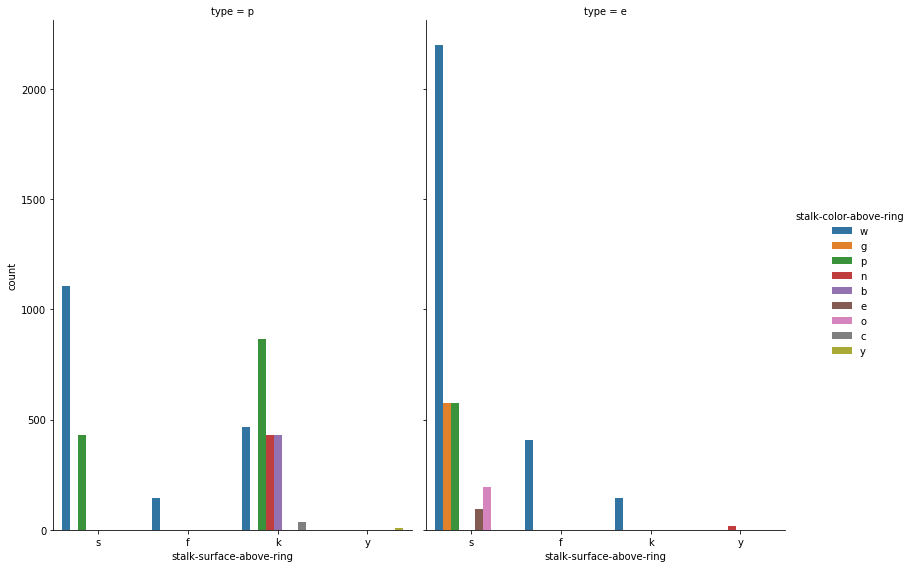

In [ ]:
plt.figure(figsize = (14,6))
g = sns.catplot(x ='stalk-surface-above-ring', hue = 'stalk-color-above-ring', col = 'type', data = data, kind = 'count', height= 8 , aspect=.7)

For stalk features above ring we can observe very similar outcomes to stalk features below ring, where silky texture have a high chance of being poisonous

Removing gill-attachment because most of the data is free gill-attachment and there is very similar distributions.

We will also remove veil-color, ring-number, and gill-spacing because of similar looking charts for both poisonous and edible

Removing stalk-root because of it's nan values.

We have to remove dimensionality right now as a part of skimming process so that down the line we can retain a decent size of features without it being too overwhelming because of onehot-encoding

In [ ]:
ndata = data.drop(['gill-attachment', 'veil-color', 'ring-number', 'gill-spacing', 'stalk-root'], axis = 1)

In [ ]:
#perform label encoder on ordinal features/true false features
#perform one hot encoding on categorical features without any particular weight/order

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)

        col_values = list(df[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed


df_mushrooms_encode = ndata.copy(deep=True)
to_be_encoded_cols = np.array(['type', 'bruises'])
label_encode(df_mushrooms_encode, to_be_encoded_cols)



df_mushrooms_encode = pd.get_dummies(df_mushrooms_encode, columns = ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-size', 'gill-color', 'stalk-shape',
                     'stalk-surface-above-ring', 'stalk-surface-below-ring',
                     'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-type', 'spore-print-color', 'population', 'habitat'])
df_mushrooms_encode.head(10)


,type,bruises,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,1,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
9,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


Type, 1 = poisonious 0 = edible

Bruises, 1 = true , 0 = false

Ring number, 2 = t(wo), 1 = o(ne), 0 = n(one)

The rest is one hot encoded

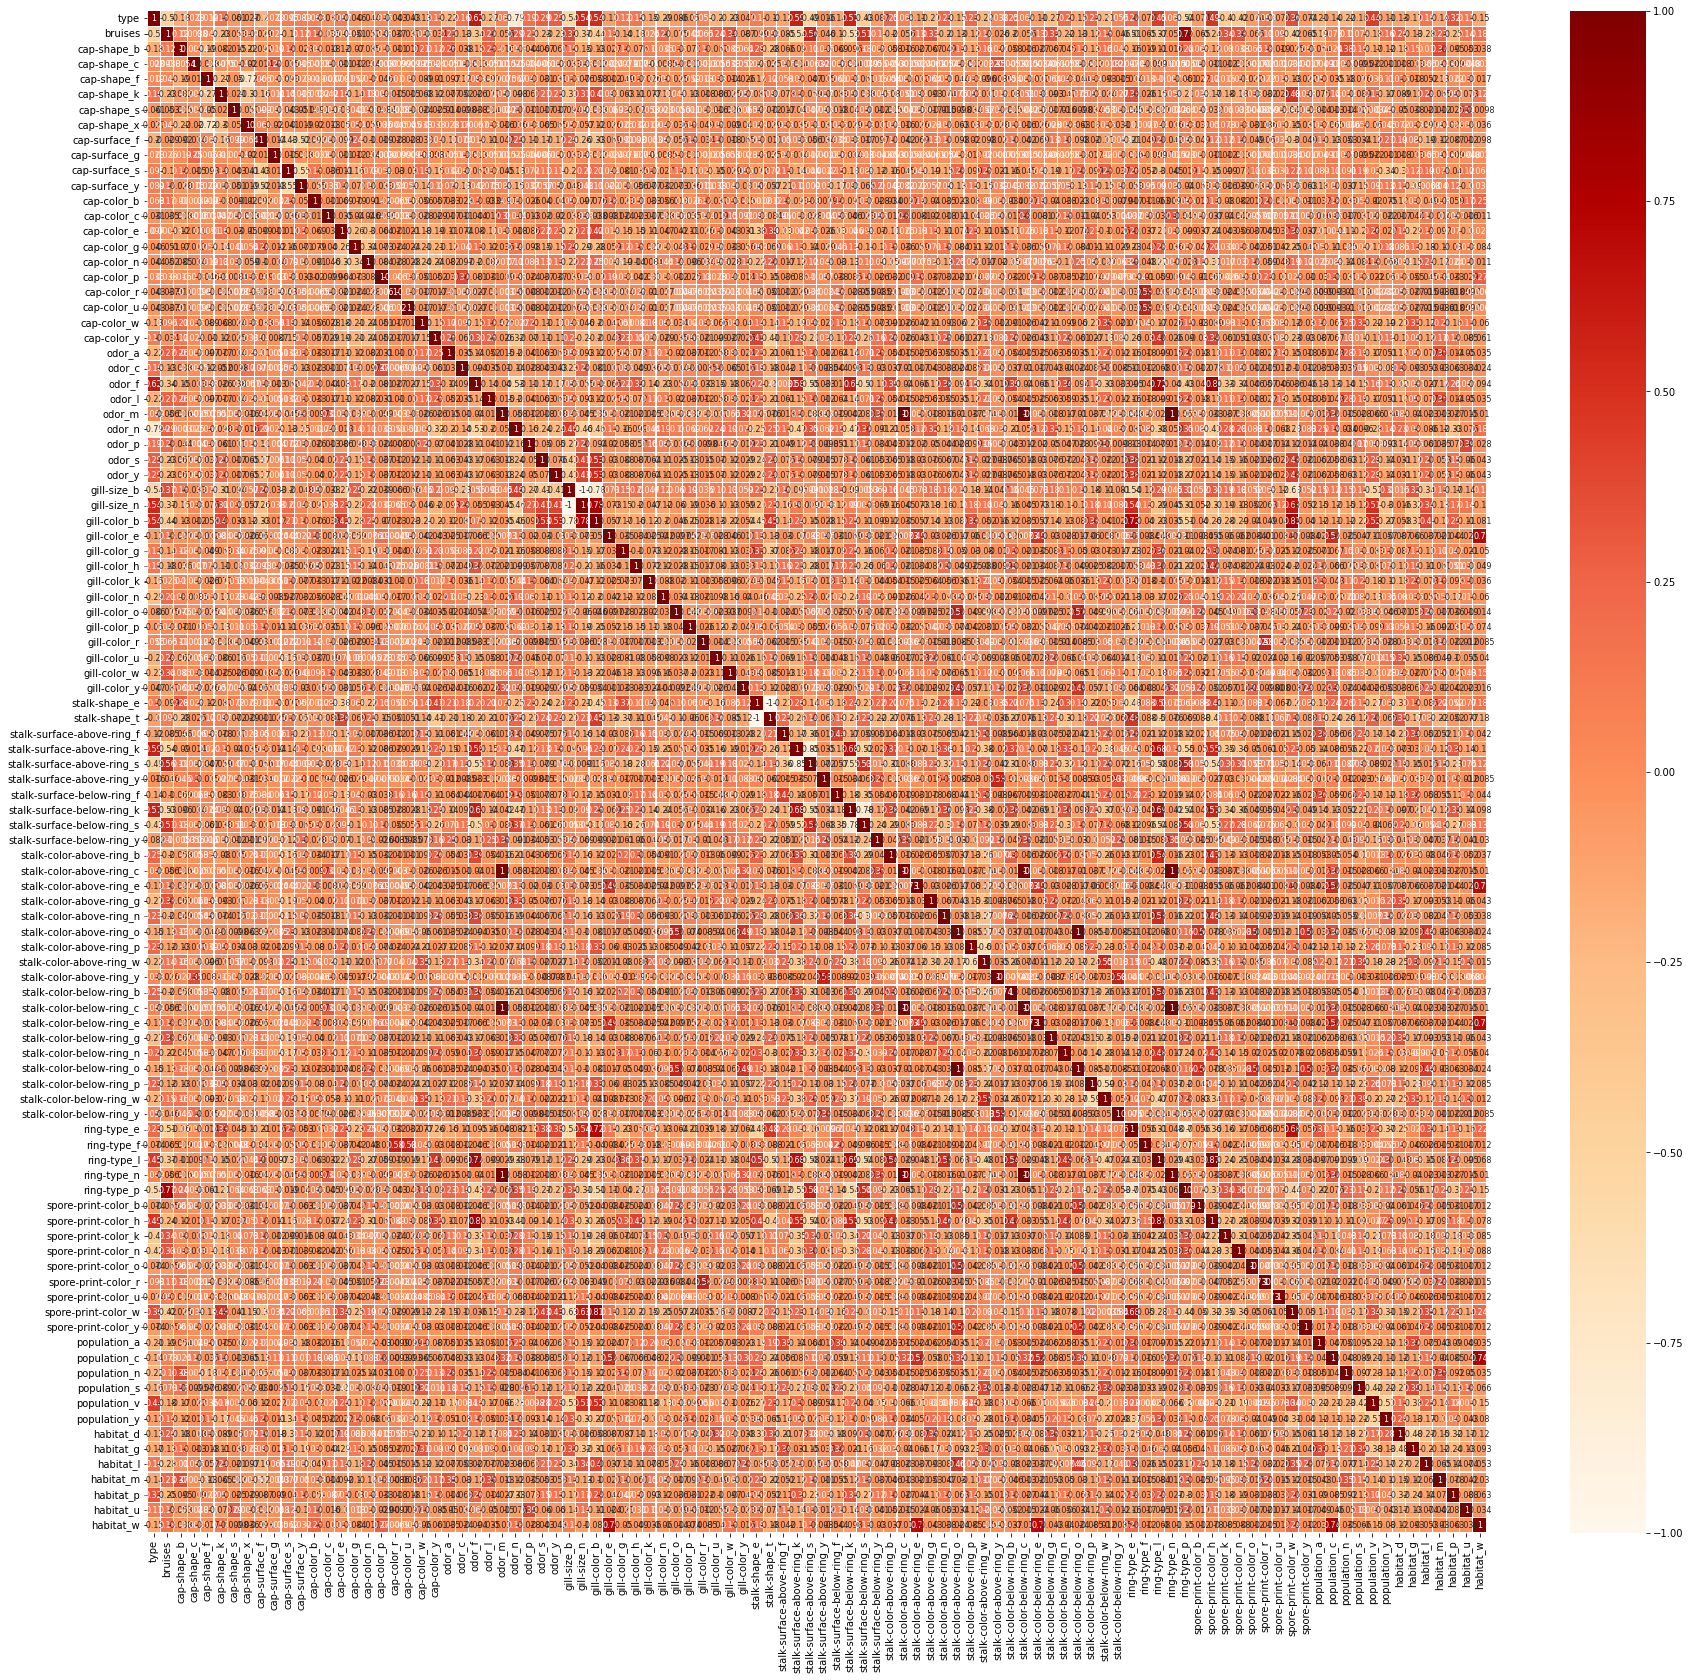

In [ ]:
plt.figure(figsize=(30,28))
sns.heatmap(df_mushrooms_encode.corr(),linewidths=.1,cmap="OrRd", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0);

notable findings odor n = -0.79 , odor f = 0.62 , stalk-surface-above-ring k = 0.59 , stalk-surface-below-ring k = 0.57, ring-type p = 0.54, gill size b, n = -0.54, 0.54

Most of these have been noted by previous inspection, most notably whether the mushroom have odor or not and whether the surface above the ring has silky texture.

In [ ]:
#Perform a ShuffleSplit of the data into training/validation/test sets, 60%/20%/20%.
from sklearn.model_selection import ShuffleSplit

split_test = ShuffleSplit(n_splits=1, test_size=.20, random_state=23800756)
for train_index, test_index in split_test.split(df_mushrooms_encode):
    train_set_full = df_mushrooms_encode.iloc[train_index]
    test_set = df_mushrooms_encode.iloc[test_index]

split_validation = ShuffleSplit(n_splits=1, test_size=.25, random_state=23800756)
for train_index, validation_index in split_validation.split(train_set_full):
    train_set = df_mushrooms_encode.iloc[train_index]
    validation_set = df_mushrooms_encode.iloc[validation_index]

In [ ]:
X_train = train_set.drop(['type'], axis = 1)
X_valid = validation_set.drop(['type'], axis = 1)
X_test = test_set.drop(['type'], axis = 1)
Y_train = train_set[['type']]
Y_valid = validation_set[['type']]
Y_test = test_set[['type']]

ExtraTreeClassifier work by training a large number of decision trees on random subsets of the data, and then averaging the results to make a final prediction. This means its able to capture a large number of interactions among the features which works great for identifying important features

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
print(model.feature_importances_)

<ipython-input-45-168ca149145d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


[2.56601829e-02 4.71045274e-03 3.13079134e-05 8.02695241e-04
 2.53408846e-04 7.54802450e-04 1.12902547e-03 4.35980187e-03
 6.99441216e-05 8.20657646e-03 2.51943518e-03 2.95328059e-03
 6.51027253e-04 3.01650550e-04 5.76881069e-04 1.14871277e-03
 3.75446785e-03 1.51169669e-04 1.01864310e-04 3.15089045e-03
 5.52959707e-03 1.43354597e-02 1.46570958e-02 7.13479391e-02
 1.31150663e-02 2.90145546e-05 1.23608523e-01 2.74804052e-02
 2.34411222e-03 3.38724519e-03 5.80025788e-02 5.59005911e-02
 2.08159987e-02 4.94117533e-04 8.92306453e-04 1.05987134e-03
 2.99604177e-04 2.25295804e-03 5.32770953e-05 2.76971123e-04
 1.97010837e-03 5.38910685e-04 1.67787605e-03 3.40842631e-06
 1.27232736e-02 1.25442427e-02 2.93156805e-03 6.56099897e-02
 3.26826002e-02 0.00000000e+00 4.25946829e-03 6.34108572e-02
 2.97737932e-02 5.24046909e-03 3.27134385e-03 2.20376842e-05
 4.80494800e-04 2.13813164e-03 2.71803130e-03 4.91771927e-05
 2.04629503e-03 5.86801814e-03 0.00000000e+00 4.47142155e-03
 2.33517258e-05 1.059455

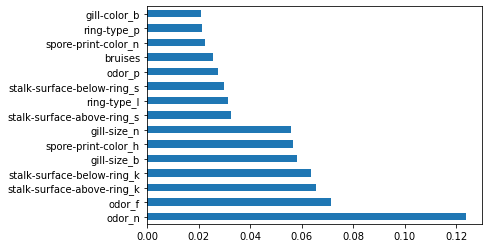

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

The top 15 most major features to look for in determining edibility.

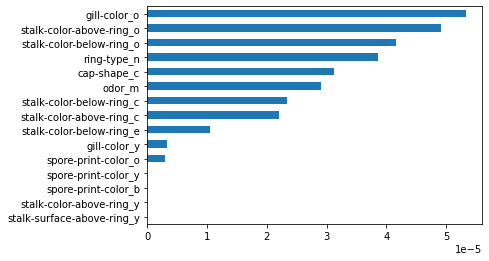

In [ ]:
feat_importances.nsmallest(15).plot(kind='barh')

Taking out the smallest 14 in feature importance. These are data that are either too irrelevant in the grandscheme or have too little sample data to make any reliable judgement.

In [ ]:
X_train = train_set.drop(['gill-color_y', 'stalk-surface-above-ring_y','stalk-color-above-ring_y','spore-print-color_b','spore-print-color_y','spore-print-color_o','odor_m','stalk-color-above-ring_c','gill-color_e', 'ring-type_n','stalk-color-below-ring_c','stalk-color-below-ring_o','gill-color_o','cap-shape_c','stalk-color-above-ring_o'], axis = 1)
X_valid = validation_set.drop(['gill-color_y', 'stalk-surface-above-ring_y','stalk-color-above-ring_y','spore-print-color_b','spore-print-color_y','spore-print-color_o','odor_m','stalk-color-above-ring_c','gill-color_e', 'ring-type_n','stalk-color-below-ring_c','stalk-color-below-ring_o','gill-color_o','cap-shape_c','stalk-color-above-ring_o'], axis = 1)
X_test = test_set.drop(['gill-color_y', 'stalk-surface-above-ring_y','stalk-color-above-ring_y','spore-print-color_b','spore-print-color_y','spore-print-color_o','odor_m','stalk-color-above-ring_c','gill-color_e', 'ring-type_n','stalk-color-below-ring_c','stalk-color-below-ring_o','gill-color_o','cap-shape_c','stalk-color-above-ring_o'], axis = 1)

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
import numpy as np

#A list of keys for the dictionary returned by p1_metrics
metric_keys = ['auc','f1','accuracy','sensitivity','specificity', 'precision']

def p1_metrics(y_true,y_pred,include_cm=True):
    cm = confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = cm.ravel()

    if include_cm:
        return {
            'auc': roc_auc_score(y_true,y_pred),
            'f1': f1_score(y_true,y_pred),
            'accuracy': (tp+tn)/np.sum(cm),
            'sensitivity': tp/(tp+fn),
            'specificity': tn/(tn+fp),
            'precision': tp/(tp+fp),
            'confusion_matrix': cm}
    else:
        return {
            'auc': roc_auc_score(y_true,y_pred),
            'f1': f1_score(y_true,y_pred),
            'accuracy': (tp+tn)/np.sum(cm),
            'sensitivity': tp/(tp+fn),
            'specificity': tn/(tn+fp),
            'precision': tp/(tp+fp)}

#This wrapper can be used to return multiple performance metrics during cross-validation
def p1_metrics_scorer(clf,X,y_true):
    y_pred=clf.predict(X)
    return p1_metrics(y_true,y_pred,include_cm=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=20, shuffle=True, random_state=23800756)

Naive Bayes Model

In [ ]:
nb = GaussianNB()
nb.fit(X_train,Y_train.values.ravel())
nb_y_pred=nb.predict(X_test)
nb_metrics = p1_metrics(Y_test.values.ravel(), nb_y_pred, include_cm=False)
print("NB Training Metrics")
for metric in nb_metrics:
    print(metric+":",nb_metrics[metric])

NB Training Metrics
auc: 1.0
f1: 1.0
accuracy: 1.0
sensitivity: 1.0
specificity: 1.0
precision: 1.0


Perfect Score on the Naive Bayes Model, trying cross validation with kfold 20 splits


In [ ]:
scores = cross_val_score(nb, X_train, Y_train.values.ravel(), cv = kf)

print("cross-validation mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cross-validation mean score of 1.00 with a standard deviation of 0.00


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



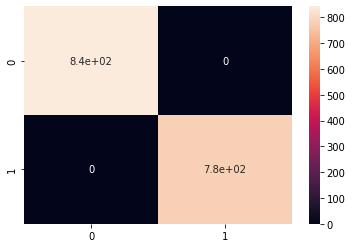

In [ ]:
predictNB = nb.predict(X_test)
cm = confusion_matrix(predictNB, Y_test)
sns.heatmap(cm, annot=True)

print(classification_report(predictNB, Y_test))

Decision Tree Model

In [ ]:
decisionTree = DecisionTreeClassifier(random_state = 23800756)
decisionTree.fit(X_train,Y_train.values.ravel())
decisionTree_y_pred=decisionTree.predict(X_test)
decisionTree_metrics = p1_metrics(Y_test.values.ravel(), decisionTree_y_pred, include_cm=False)
print("Decision Tree Training Metrics")
for metric in nb_metrics:
    print(metric+":",nb_metrics[metric])

Decision Tree Training Metrics
auc: 1.0
f1: 1.0
accuracy: 1.0
sensitivity: 1.0
specificity: 1.0
precision: 1.0


In [ ]:
scores = cross_val_score(decisionTree, X_train, Y_train.values.ravel(), cv = kf)

print("cross validation mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cross validation mean score of 1.00 with a standard deviation of 0.00


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



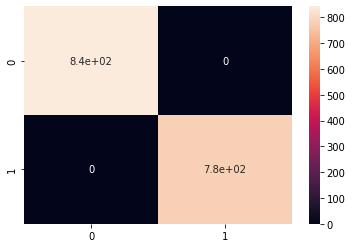

In [ ]:
predictdt = decisionTree.predict(X_test)
cm = confusion_matrix(predictdt, Y_test)
sns.heatmap(cm, annot=True)

print(classification_report(predictdt, Y_test))

Random Forest Model

In [ ]:
rf = RandomForestClassifier(random_state = 23800756)
rf.fit(X_train,Y_train.values.ravel())
rf_y_pred=rf.predict(X_test)
rf_metrics = p1_metrics(Y_test.values.ravel(), rf_y_pred, include_cm=False)
print("RandomForest Training Metrics")
for metric in nb_metrics:
    print(metric+":",nb_metrics[metric])

RandomForest Training Metrics
auc: 1.0
f1: 1.0
accuracy: 1.0
sensitivity: 1.0
specificity: 1.0
precision: 1.0


In [ ]:
scores = cross_val_score(rf,X_train, Y_train.values.ravel(), cv = kf)

print("cross validation mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cross validation mean score of 1.00 with a standard deviation of 0.00


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



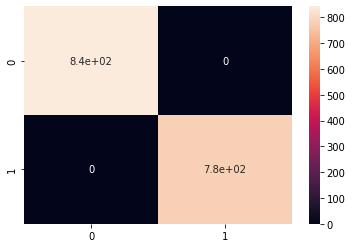

In [ ]:
predictrf = rf.predict(X_test)
cm = confusion_matrix(predictrf, Y_test)
sns.heatmap(cm, annot=True)

print(classification_report(predictrf, Y_test))

Seems that the model has a very clear indication of edibility as all 3 classification had perfect scores. This means the models are able to look at the existence(or non-existence) of the top few correlating features and although some of these features have close to ~ 90% accuracy, with conjunction with other high correlating feature the model can perfectly predict edibility.